In [ ]:
#Using the Titanic Machine Learning from diaster dataset from Kaggle.com

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
test = pd.read_csv('titanic_test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#survived is a clasification on whether they survived or not
#SibSp - siiblings on board
#Embarked: C: Shareboard, S: Southampton, Q:Queensdown

In [ ]:
#EDA

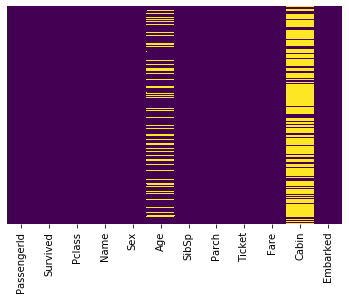

In [9]:
#Use seaborn to see where most data is missing
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [11]:
#We are missing alot of age and cabin data.

In [ ]:
sns.set_style('whitegrid')

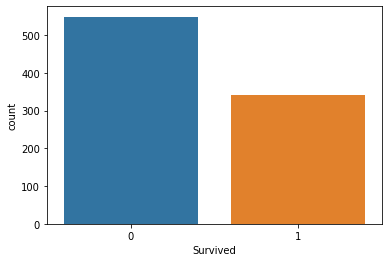

In [12]:
sns.countplot(x='Survived', data=train)

In [ ]:
#It looks like 550 survived and around 350 did survived, adding a hue we see more male died and more women survived.
#There was also more men on the ship


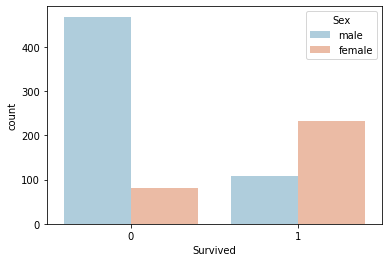

In [13]:
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r')

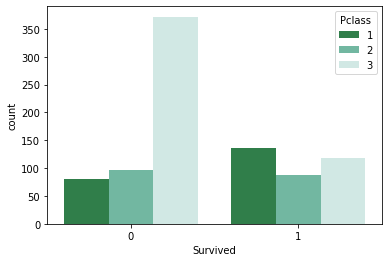

In [16]:
sns.countplot(x='Survived', data=train, hue='Pclass', palette='BuGn_r')

In [ ]:
#Adding a the class, we see people in third class(lowest class) had the higest death rate. 
#To have a better look we need to compare the amount of each class.
#We do see the highest survival rate is around the higher class

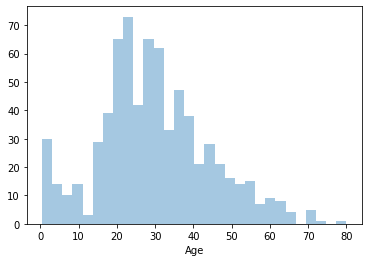

In [21]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

In [ ]:
#Average age around 20-30, more younger passengers.

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Lets explore the SibSp: number of siblings on board, children or spouse

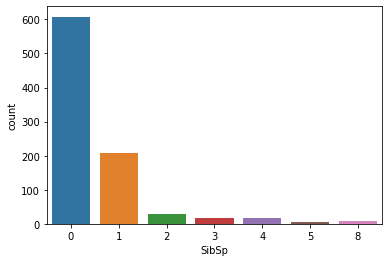

In [23]:
sns.countplot(x='SibSp', data=train)

In [ ]:
#majority had no siblings spouse, around 200 had one sibiling or spouse(most likely a spouse)

In [30]:
import cufflinks as cf
cf.go_offline()

In [31]:
train['Fare'].iplot(kind='hist', bins=50)

In [ ]:
#We see most passengers are in the cheaper class which shows in this graph because the graph is skewed to the 
#left where the price is cheaper.

In [ ]:
#Cleaning Data

In [ ]:
'''We should fill in the age column instead of dropping them because their is not much missing. 
We can do this by filling in the missing age with the mean age or by checking the average age by passenger 
class. This is known as imputation
'''



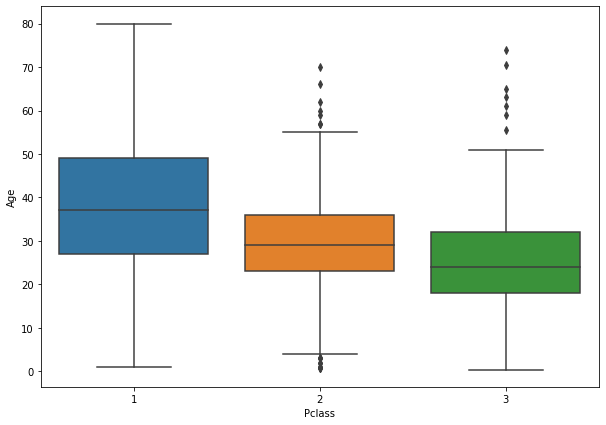

In [33]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [ ]:
'''We see a trend that the higher the class the higher the age. We can now use the boxplot to 
get the mean age for each class'''

In [37]:
def impute_age(cols):
    Age = cols[0]
    Pclass= cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
        
    
    

In [38]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1) #applying to the list of columns and effect on cols

In [41]:
train.drop('Cabin', axis=1, inplace=True)

In [43]:
train.dropna(inplace=True)
#We are the dropping the row because embarked had one missing value

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [ ]:
#Catagorical Features, into dummy variables for machine learning algorithm for e.g. male or female

In [47]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
#to avoid Multicolinearity we dro the first column because the algorithm knows if male is one female is zero

In [51]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [52]:
train = pd.concat([train,sex,embark], axis=1)

In [53]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [58]:
train.drop(['Sex', 'Embarked','Name', 'Ticket'], axis=1, inplace=True)
train.drop(['PassengerId'], axis=1, inplace=True) #was an index

In [59]:
train.head()
#Data is now perfect for machine learning, they are all numeric
#Parch : parents or children onboard

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
#Using Logistic Regression

In [ ]:
#We are going to use a LR model to predict the classes on whether a passenger survived on the titanic

In [63]:
X = train.drop('Survived', axis=1)
y= train['Survived'] #we want to predict a zero or one this column

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
logmodel = LogisticRegression()

In [78]:
#train the model
logmodel.fit(X_train, y_train)

In [71]:
predictions = logmodel.predict(X_test)

In [72]:
from sklearn.metrics import classification_report

In [73]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [76]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[148,  15],
       [ 36,  68]])

In [77]:
# So we have 15 type 1 error and 36 type 2 error.
confusion_matrix(y_test,predictions)/267

array([[0.55430712, 0.05617978],
       [0.13483146, 0.25468165]])

In [ ]:
'''
We see that the accuracy is : true positve + true negative which is: 81%, which is good for the size of 
the data.
Misclassification rate(error rate) is : 19%, false negative is too high, which is where it is actually yes
but our model predicted no.
'''